In [37]:
import os
import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import numpy as np

In [ ]:
COLORS = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
        '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
        '#aec7e8', '#ffbb78', '#98df8a', '#ff9896', '#c5b0d5',
        '#c49c94', '#f7b6d2', '#c7c7c7', '#dbdb8d', '#9edae5')

font_paths = ['CMUSerif-Roman-Custom.ttf']

for font_path in font_paths:
    fm.fontManager.addfont(font_path)

fm._load_fontmanager(try_read_cache=False)

plt.rcParams['font.size'] = 22
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif Custom']
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
def g1(x):
    return x * np.e**x

def g2(x):
    return x**2 * np.sin(3 * x)

def g3(x):
    return np.sin(np.pi / x)

### Задача 1.

In [44]:
def diff2(x_0, h, f):
    return (f(x_0 + h) - f(x_0 - h))/(2 * h)

### Задача 2.

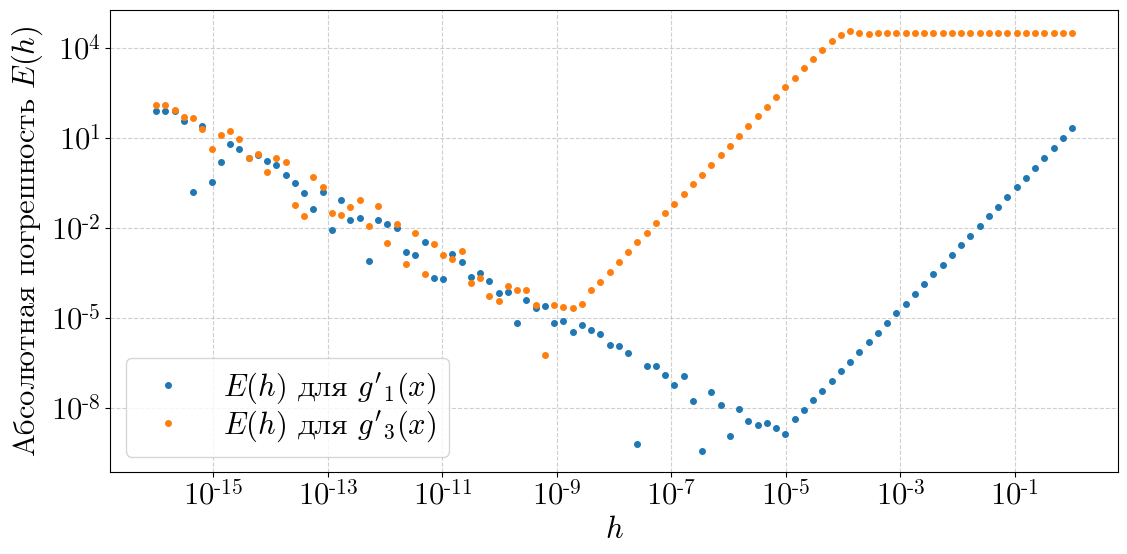

In [47]:
G1_DIFF_REF = 80.342147692751
G3_DIFF_REF = -31415.926535897932

h_set = np.logspace(-16, 0, 100)

g1_abs_err = np.abs(np.array([diff2(3, h, g1) for h in h_set]) - G1_DIFF_REF)
g3_abs_err = np.abs(np.array([diff2(0.01, h, g3) for h in h_set]) - G3_DIFF_REF)


fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err, 'o', markersize=4, label='$E(h$) для $g\'_1(x)$')
ax.loglog(h_set, g3_abs_err, 'o', markersize=4, label='$E(h)$ для $g\'_3(x)$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')
ax.legend(labelspacing=0.1)


plt.show()
# plt.savefig('fig1.pdf', bbox_inches = 'tight')

### Задача 3.

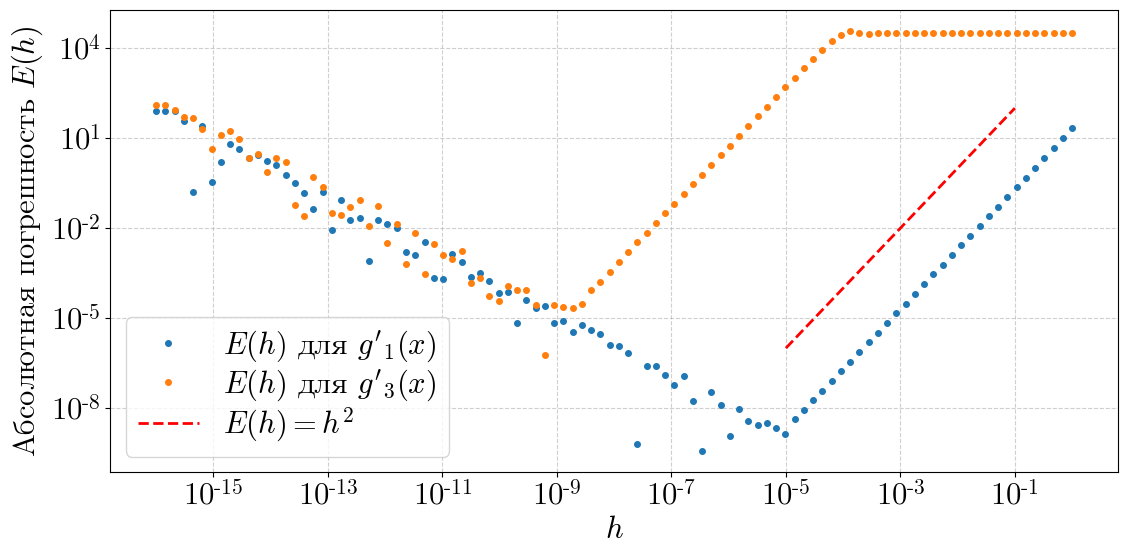

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err, 'o', markersize=4, label='$E(h$) для $g\'_1(x)$')
ax.loglog(h_set, g3_abs_err, 'o', markersize=4, label='$E(h)$ для $g\'_3(x)$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')

h_set_for_sq = np.logspace(-5, -1, 50)
ax.loglog(h_set_for_sq, 10**(4)*h_set_for_sq**2, '--', linewidth=2, color='red', label='$E(h) = h^2$')
ax.legend(labelspacing=0.1)


plt.show()
# plt.savefig('fig2.pdf', bbox_inches = 'tight')

### Задача 4.

In [ ]:
def composite_simpson(a, b, n, f):
    if n % 2:
        n += 1

    x = np.linspace(a, b, n + 1)
    h = (b - a) / n

    return h/3. * (f(x[0]) + 2 * np.sum(f(x[2:-1:2])) + 4 * np.sum(f(x[1::2])) + f(x[-1]))

### Задача 5.

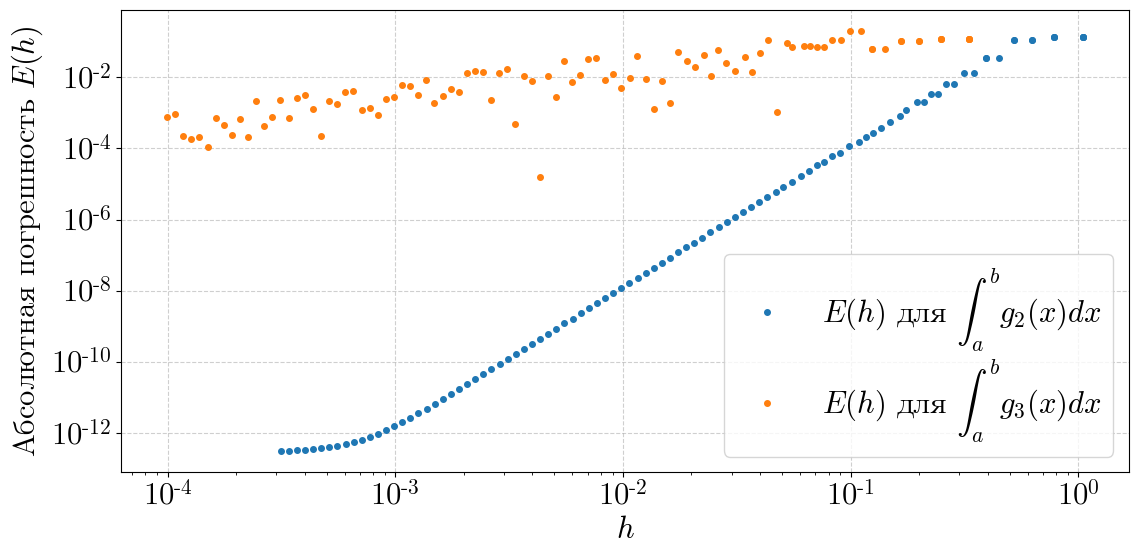

In [56]:
G2_INT_REF = 3.141719985548
G3_INT_REF = -0.23144252891

n_set = np.geomspace(3, 9999, 100, dtype=int)

g2_abs_err = np.abs(np.array([composite_simpson(0, np.pi, n, g2) for n in n_set]) - G2_INT_REF)
g3_abs_err = np.abs(np.array([composite_simpson(0.005, 1, n, g3) for n in n_set]) - G3_INT_REF)


fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog((np.pi - 0) / n_set, g2_abs_err, 'o', markersize=4, label=r'$E(h)$ для $\int_a^b g_2(x)dx$')
ax.loglog((1 - 0.005) / n_set, g3_abs_err, 'o', markersize=4, label=r'$E(h)$ для $\int_a^b g_3(x)dx$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')
ax.legend(labelspacing=0.1)


plt.show()
# plt.savefig('fig3.pdf', bbox_inches = 'tight')

### Задача 6.

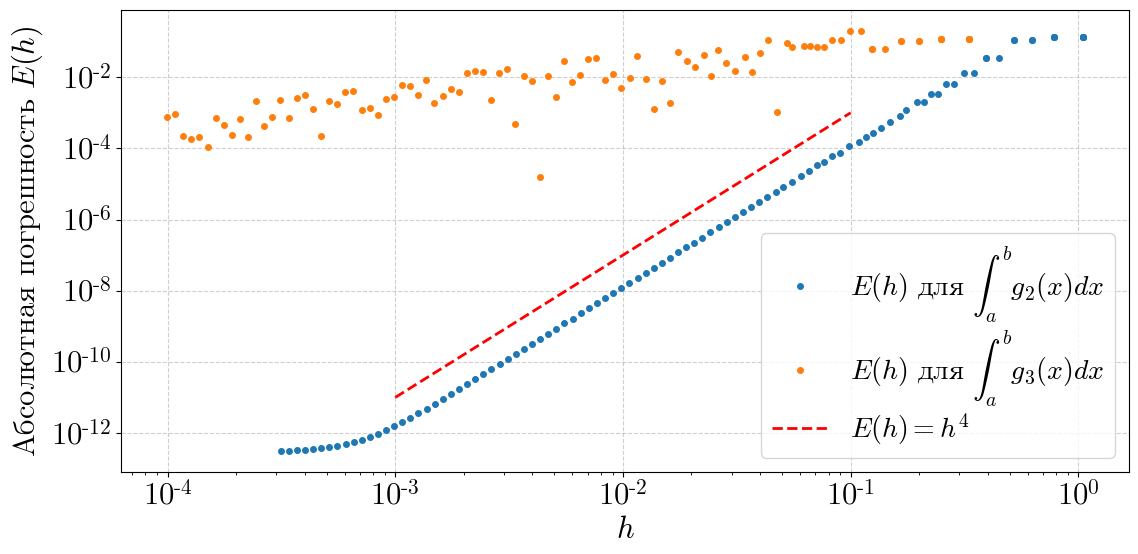

In [69]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog((np.pi - 0) / n_set, g2_abs_err, 'o', markersize=4, label=r'$E(h)$ для $\int_a^b g_2(x)dx$')
ax.loglog((1 - 0.005) / n_set, g3_abs_err, 'o', markersize=4, label=r'$E(h)$ для $\int_a^b g_3(x)dx$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')

h_set_for_sq = np.logspace(-3, -1, 50)
ax.loglog(h_set_for_sq, (10*1)*h_set_for_sq**4, '--', linewidth=2, color='red', label='$E(h) = h^4$')
ax.legend(labelspacing=0.1, fontsize=20)


plt.show()
# plt.savefig('fig4.pdf', bbox_inches = 'tight')

### Задача 8.

In [61]:
def diff4(x_0, h, f):
    return (f(x_0 - 2 * h) - 8 * f(x_0 - h) + 8 * f(x_0 + h) - f(x_0 + 2 * h)) / (12 * h)

### Задача 9.

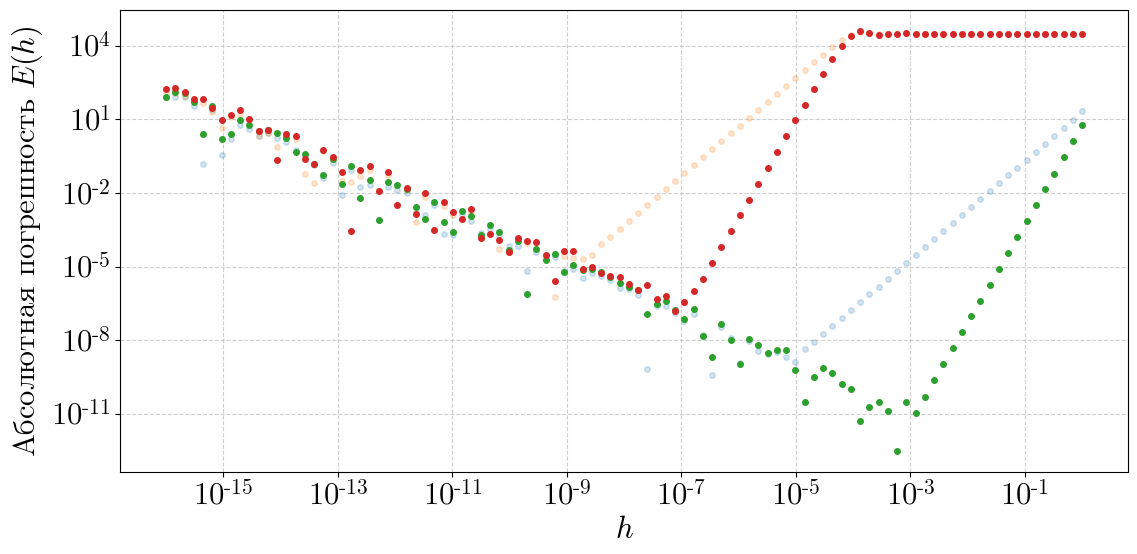

In [137]:
g1_abs_err2 = np.abs(np.array([diff2(3, h, g1) for h in h_set]) - G1_DIFF_REF)
g3_abs_err2 = np.abs(np.array([diff2(0.01, h, g3) for h in h_set]) - G3_DIFF_REF)

g1_abs_err4 = np.abs(np.array([diff4(3, h, g1) for h in h_set]) - G1_DIFF_REF)
g3_abs_err4 = np.abs(np.array([diff4(0.01, h, g3) for h in h_set]) - G3_DIFF_REF)


fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err2, 'o', markersize=4, label='$E(h$) для $g\'_1(x), p=2$', alpha=0.2)
ax.loglog(h_set, g3_abs_err2, 'o', markersize=4, label='$E(h)$ для $g\'_3(x), p=2$', alpha=0.2)
ax.loglog(h_set, g1_abs_err4, 'o', markersize=4, label='$E(h$) для $g\'_1(x), p=4$')
ax.loglog(h_set, g3_abs_err4, 'o', markersize=4, label='$E(h)$ для $g\'_3(x), p=4$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')

plt.show()
# plt.savefig('fig5.pdf', bbox_inches = 'tight')

### Задача 10.

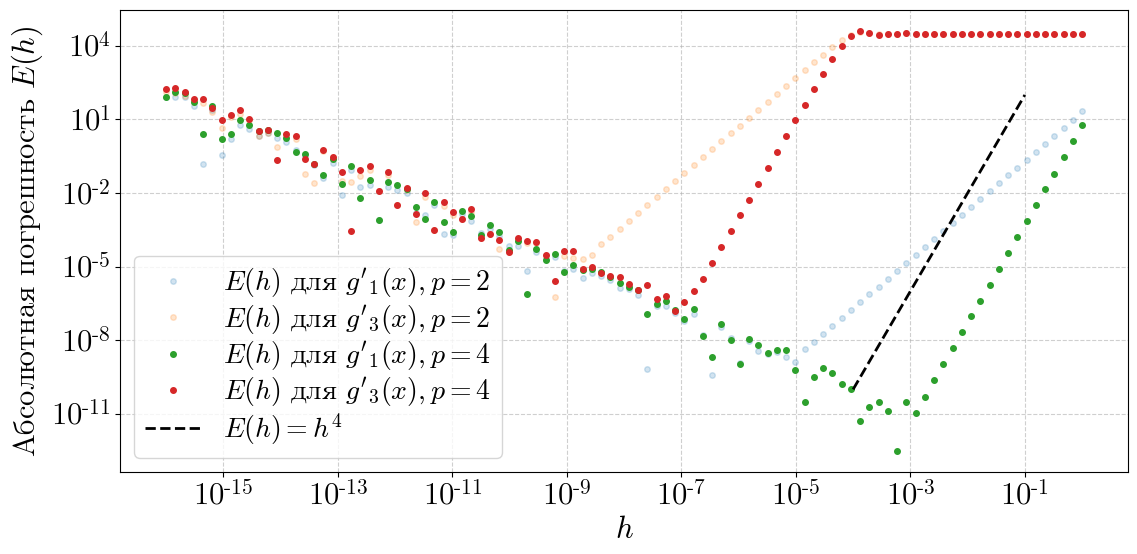

In [151]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))

ax.set_prop_cycle(color=COLORS)
ax.minorticks_on()
ax.grid(True, linestyle='--', alpha=0.6)

ax.loglog(h_set, g1_abs_err2, 'o', markersize=4, label='$E(h$) для $g\'_1(x), p=2$', alpha=0.2)
ax.loglog(h_set, g3_abs_err2, 'o', markersize=4, label='$E(h)$ для $g\'_3(x), p=2$', alpha=0.2)
ax.loglog(h_set, g1_abs_err4, 'o', markersize=4, label='$E(h$) для $g\'_1(x), p=4$')
ax.loglog(h_set, g3_abs_err4, 'o', markersize=4, label='$E(h)$ для $g\'_3(x), p=4$')
ax.set_xlabel('$h$')
ax.set_ylabel('Абсолютная погрешность $E(h)$')
ax.legend(labelspacing=0.1, fontsize=20)


h_set_for_sq = np.logspace(-4, -1, 50)
ax.loglog(h_set_for_sq, (10**6)*h_set_for_sq**4, '--', linewidth=2, color='black', label='$E(h) = h^4$')
ax.legend(labelspacing=0.1, fontsize=20)

plt.show()
# plt.savefig('fig6.pdf', bbox_inches = 'tight')

### Задача 12.

In [168]:
def gauss_quad5(f):
    return (5/9) * f(-np.sqrt(3/5)) + (8/9) * f(0) + (5/9) * f(np.sqrt(3/5))

### Задача 13.

In [196]:
def gauss_variable_replace(a, b, f):
    def f_new(t):
        x = t * (b - a) / 2  + (a + b) / 2
        return f(x)
    return f_new

In [320]:
# generated_coeffs = [np.round(np.random.randn(n), 3) for n in range(1, 8)]

generated_coeffs = [[1.433],
                   [0.851, 0.145],
                   [0.128, -0.112, -1.241],
                   [-0.399,  1.628, -0.237,  1.440],
                   [-1.133, -0.729,  0.037, -1.546,  0.374],
                   [0.665, 1.780, 1.085, 0.675, 0.844, 0.066],
                   [-1.935, -0.111,  0.213, -0.708,  1.326,  0.876, -2.142]]


generated_polynomials = [np.polynomial.Polynomial(coeffs) for coeffs in generated_coeffs]

In [340]:
for k, p in enumerate(generated_polynomials):
    print(f'Интеграл от 0 до 2 для P_{k}(x):', gauss_quad5(gauss_variable_replace(0, 2, p)))

Интеграл от 0 до 2 для P_0(x): 2.866
Интеграл от 0 до 2 для P_1(x): 1.992
Интеграл от 0 до 2 для P_2(x): -3.277333333333334
Интеграл от 0 до 2 для P_3(x): 7.586
Интеграл от 0 до 2 для P_4(x): -7.415733333333334
Интеграл от 0 до 2 для P_5(x): 16.588933333333333
Интеграл от 0 до 2 для P_6(x): -27.59568
